<a href="https://colab.research.google.com/github/JamesChung821/python/blob/master/%E3%80%8CLinear_Regression_and_Regularizations_200722a_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
- Ordinary Linear Regression
- Constraints
  - Ridge
  - LASSO
- Cross Validation

Define data for linear regression

Text(0, 0.5, 'resistance')

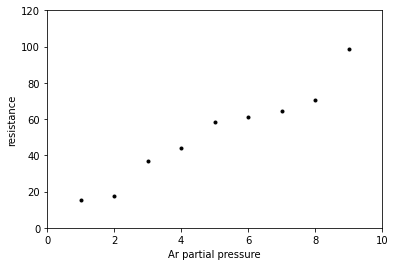

In [ ]:
# %matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

partialpressure = np.arange(1,10)[:,None]
resistance = np.asarray([15.6, 17.5, 36.6, 43.8, 58.2, 61.2, 64.2, 70.4, 98.8])[:,None]
plt.figure()
plt.plot(partialpressure, resistance, 'k.')
plt.xlim([0,10])
plt.ylim([0,120])
plt.xlabel('Ar partial pressure')
plt.ylabel('resistance')

Apply Ordinary Least Squares

[4.80277778] [[9.40166667]]


Text(0, 0.5, 'resistance')

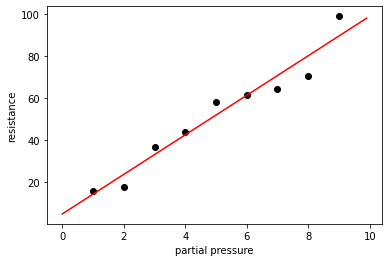

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True)
LR.fit(partialpressure, resistance)

xx = np.arange(0,10,.1)[:,None]
yy = LR.predict(xx)

plt.figure()
plt.plot(partialpressure, resistance, 'ko')
plt.plot(xx, yy, 'r')
intercept = LR.intercept_
coef = LR.coef_
print(intercept, coef)
plt.xlabel('partial pressure')
plt.ylabel('resistance')

How can we understand this in terms of loss? \
We will use Mean squared error for Loss:
MSE = $ (1/N) \Sigma_i  \epsilon_i^2  $
The following code plots MSE as a function of $\beta$ coefficients. E.g. as the slope ($\beta_1$) and intercept ($\beta_0$) of the fitting line change, how does it impact MSE?

In [ ]:
# Performance metrics
from sklearn.metrics import mean_squared_error

slope_true = 9.4
intercept_true = 4.8

slope_, intercept_ = np.meshgrid(np.arange(-10,20,.1), np.arange(-80,80,2))
slope_ = slope_.flatten(); intercept_ = intercept_.flatten()
mse = np.zeros(slope_.shape)
rsquared = np.zeros(slope_.shape)

for i in range(slope_.shape[0]):
  y_hat = slope_[i] * partialpressure + intercept_[i]
  mse[i] = mean_squared_error(resistance, y_hat)

def update(slope = 9.4, intercept = 4.8):
  plt.figure(figsize = (8,4))
  xx = np.arange(0,10,.1)
  yy = slope * xx + intercept

  plt.subplot(1,2,1)
  plt.plot(partialpressure, resistance, 'ko')
  plt.plot(xx, yy, 'r')
  plt.xlim([0,10])
  plt.ylim([0,100])
  plt.xlabel('x'); plt.ylabel('y')

  plt.subplot(1, 2, 2)
  # plotting mse^(1/5) just so can see the color range better.
  plt.scatter(slope_, intercept_, s = 10, c = mse**.2, cmap = 'viridis')
  plt.plot(slope_true, intercept_true, 'ro')
  plt.plot(slope, intercept, 'mx')  
  plt.xlim([-10,20])
  plt.ylim([-80,80])
  plt.xlabel('slope'); plt.ylabel('intercept')

interact(update, slope = (-10,20,.1), intercept = (-80,80,2));

interactive(children=(FloatSlider(value=9.4, description='slope', max=20.0, min=-10.0), IntSlider(value=4, des…

Applying Ridge Regression and LASSO to our data.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV

# Ridge Regression
RR = Ridge(alpha=0.0005, fit_intercept=True)
RR.fit(partialpressure, resistance)
print(RR.intercept_, RR.coef_)

# LASSO
L1 = Lasso(alpha=0.0005, fit_intercept=True)
L1.fit(partialpressure, resistance)
print(L1.intercept_, L1.coef_)

[4.80316951] [[9.40158832]]
[4.80315278] [9.40159167]


Now let's look at more complex data. \
Create a polynomial function $y = 0.1x^4 + 0.5x^3 + 0.5x^2 + x + 2$  \
Then sample and plot the data.

(100, 1) (100, 5) (5, 1)


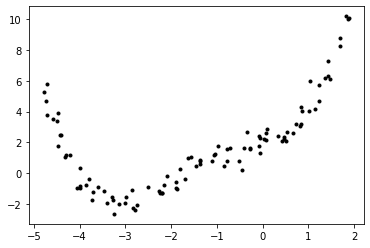

In [ ]:
N = 100
x = np.random.uniform(-5,2,(N,1))
o = np.ones(x.shape)
X = np.concatenate((x**4,x**3,x**2,x**1,o),axis = 1)
c = np.asarray([.1,.5,.5,1,2])[:,None]
print(x.shape,X.shape,c.shape)
y = X @ c + np.random.normal(0,.5,x.shape)

plt.figure()
plt.plot(x,y,'k.')

Fit the data with OLS, Ridge Regression, and LASSO

In [ ]:
LR = LinearRegression(fit_intercept=True)
LR.fit(X, y)
print(LR.intercept_, LR.coef_)

RR = Ridge(alpha=0.0005, fit_intercept=True)
RR.fit(X, y)
print(RR.intercept_, RR.coef_)

L1 = Lasso(alpha=1, fit_intercept=True)
L1.fit(X, y)
print(L1.intercept_, L1.coef_)

[1.96927911] [[0.0915883  0.46524778 0.54141334 1.17009873 0.        ]]
[1.96927917] [[0.09158902 0.46525167 0.54141212 1.17008032 0.        ]]
[2.60317358] [0.11630074 0.51963851 0.         0.         0.        ]


Cross Validation \
If we were going to split the data using Cross Validation, how would the groups look? \
We're going to use 10-fold cross validation: \
*Randomly* split the data into groups of 10 \
One method to do this:
* Reorder samples using random permutation
* Use new order to split samples into 10 groups.

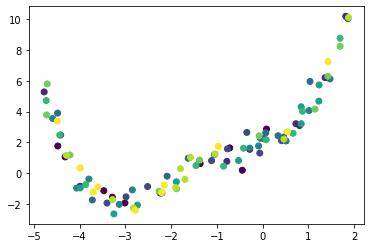

In [ ]:
# let's get a random permutation
rand_order = np.random.permutation(N)

# use the random permutation to reorder our data.
# our pairs of data (x,y) are still tied together, just new order:
# (x1,y1), (x2,y2), (x3,y3), (x4,y4), (x5,y5)
# becomes:
# (x5,y5), (x2,y2), (x3,y3), (x1,y1), (x4,y4)

X_split = [None]*10
y_split = [None]*10
x_split = [None]*10
labels = np.zeros((N,1))

x_reordered = x[rand_order]
y_reordered = y[rand_order]

for i in range(10):
  start_num = i*10
  end_num = i*10+10
  idx = rand_order[start_num:end_num]
  X_split[i] = X[idx,:]
  y_split[i] = y[idx]
  labels[start_num:end_num] = i

plt.figure()
plt.scatter(x_reordered, y_reordered, c = labels)



Colinearity and Ridge Regression \
Let's investigate what happens if we have 2 input variables $x_1$ and $x_2$ that are colinear.

(100, 1) (100, 1)


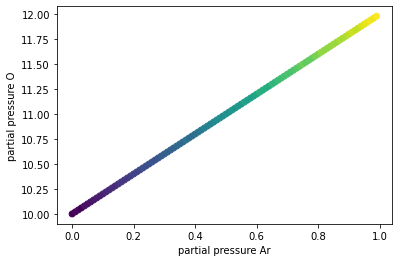

(100, 2)
[[-5.57546550e+12  2.78773275e+12]]
[[1.58888659 3.17777318]]


In [ ]:
# Create c
N = 100
x = np.arange(0,1,.01)[:,None]
x1 = x
x2 = 2*x1 + 10
beta1 = 2
beta2 = 3
y = beta1*x1 + beta2*x2 + np.random.normal(0,.1,x.shape)

print( x1.shape, x2.shape)

plt.figure()
plt.scatter(x1, x2, c = y)
plt.xlabel('partial pressure Ar')
plt.ylabel('partial pressure O')
plt.show()

X = np.concatenate((x1,x2),axis = 1)
print(X.shape)

LR = LinearRegression()
LR.fit(X, y)

xx = np.arange(0,10,.1)[:,None]
yy = LR.predict(X)

coef = LR.coef_
print(coef)

RR = Ridge(alpha=.1).fit(X, y)
print(RR.coef_)

Ridge Regression with Cross Validation \
How do we pick the optimal weight for ridge regression? Cross Validation! \
Scikit Learn has a built in method for using CV to select a parameter.

In [ ]:
from sklearn.linear_model import RidgeCV

RRCV = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv = 5).fit(X, y)
print(RRCV.alpha_)
print(RRCV.coef_)

0.01
[[1.5923181  3.18463621]]


Residuals \
Examples of residual profiles.

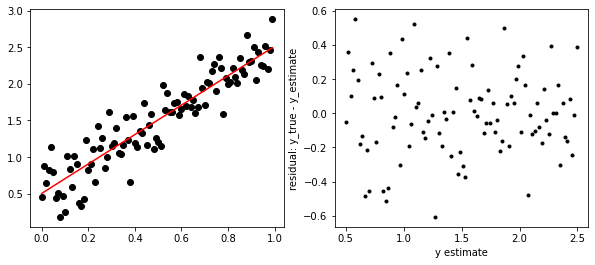

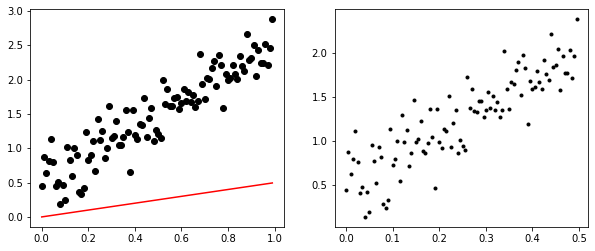

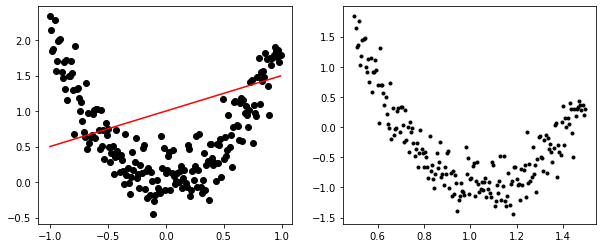

In [ ]:
from sklearn.linear_model import LinearRegression

# first example
x = np.arange(0,1,.01)[:,None]
y = 2*x + .5 + np.random.normal(0,.25,x.shape)
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(x,y,'ko')

LR = LinearRegression(fit_intercept=True).fit(x,y)
y_hat = LR.predict(x)
plt.plot(x, y_hat, 'r')

plt.subplot(1,2,2)
plt.plot(y_hat, y-y_hat ,'k.')
plt.xlabel('y estimate')
plt.ylabel('residual: y_true - y_estimate')

# second example
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(x,y,'ko')

y_hat = .5*x
plt.plot(x, y_hat, 'r')

plt.subplot(1,2,2)
plt.plot(y_hat, y - y_hat ,'k.')

# third example
x = np.arange(-1,1,.01)[:,None]
y2 = 2*x**2 + np.random.normal(0,.25,x.shape)
y_hat = .5*x + 1
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(x,y2,'ko')
plt.plot(x,y_hat,'r')

plt.subplot(1,2,2)
plt.plot(y_hat,y2 - y_hat,'k.')

# Example 4